In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

In [33]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

In [3]:
surface_density = np.loadtxt('../output/mminmax_density_1deg_fixed.txt')

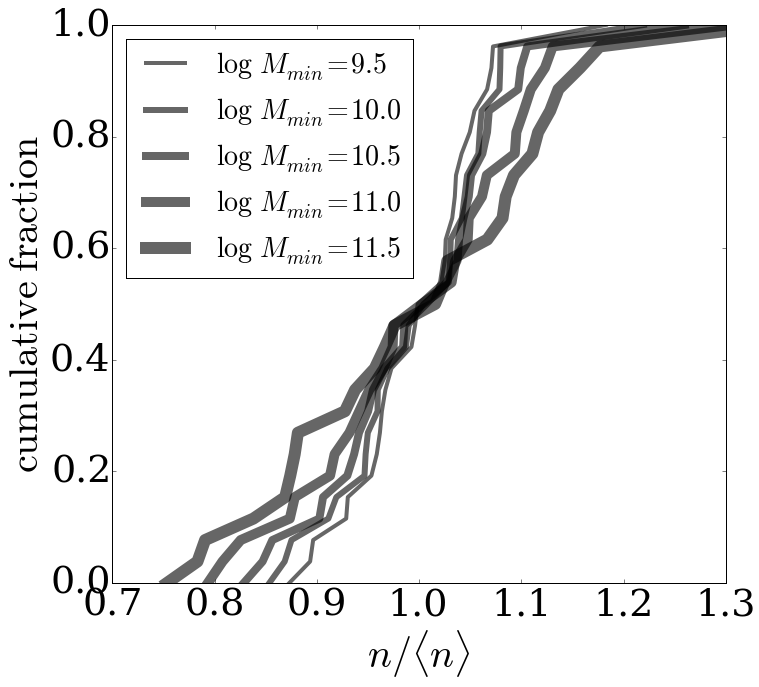

In [65]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=38)

n_lines = len(surface_density)
m_min = surface_density[:,0]
m_max = surface_density[:,1]
m_min_list = list(set(m_min))

for i in range(n_lines):
    if m_min[i] in m_min_list:
        m_min_list.remove(m_min[i])
        
        m_min_tmp = surface_density[i][0]
        sort_n = np.sort(surface_density[i][2:])
        n_points = len(sort_n)
        int_n = np.linspace(0.0,1.0,n_points)
        
        
        label = "$\log\  M_{min} = %.1f$"%(m_min[i])
        plt.plot(sort_n/sort_n.mean(), int_n, lw=2.0*(6-len(m_min_list)), alpha=0.6, label=label, color='black')
        
ax.set_xlim([0.7, 1.3])
ax.set_ylim([0.0,1.0])

plt.xlabel(r'$n/\langle n\rangle$', size=40)
plt.ylabel(r'$\mathrm{cumulative\ fraction}$', size=40)
plt.legend(loc=2, prop={'size':28})
plt.savefig('fig1.pdf')